<a href="https://colab.research.google.com/github/34Dany/Coder2024-Data-Science/blob/main/Trabajo_Final_Data_Science_Daniel_Fanara2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.auth import default
from google.colab import auth
!pip install gspread pandas openpyxl

*Dataframe Robos unidades*

# Introducción

Con el fin de analizar el comportamiento de los siniestros por robo de unidad se propone analizar los robos del período 202310 acaecidos y registrados en la superintendencia en Argentina
estudiando el comportamiento de las siguientes variables:



*   Modelos mas Robados
*   Zonas de mayor frecuencia  
*   Frecuencia por fechas de tramite
*   Incidencia en la frecuencia del año de la unidad siniestrada
*   Incidencia en la frecuencia por algun patron en la edad de los titulares




Teniendo a disposición estos datos, podemos analizarlos y desmenuzarlos con el fin de poder indagar acerca de la existencia o no, de algún parámetro que refleje alguna tendencia actual en cuanto a cantidad de robos segun año / modelo o zona.
Ésta información podría serle de utilidad a las compañías de seguros, e incluso a los concesionarios , para poder determinar su produccion / standares de ventas.

Con ello surgen una cierta variedad de hipótesis, que dan lugar a una Hipótesis mayor, es decir, la hipótesis que trataremos de resolver en el presente trabajo.

Hipótesis 0: Existe una relacion  entre la cantidad de robos y el año de la unidad

Aplicando esta hipótesis obtenemos del análisis inicial.


**Contexto Empresarial:**

El complejo y exhaustivo panorama económico que está atravesando la argentina, con el constante cambio de costos y precios todos los dias, se necesita realizar un análisis y reformulación constante de los costos de las coberturas de seguros , de acuerdo a aquellas que generan gran volumen de erogación monetaria en pagos por siniestros. Siendo de esta forma, reformulada la base de aplicación de las nuevas tarifas , en funcion a la frecuencia siniestral de cada tipo de unidad suscripta


**Problema Empresarial**

Dentro de la revisión se determina que hubo un gran incremento de la cantidad de robos totales en el territorio argentino, el amparo de tal cobertura, al ser abonada ante el siniestro, genera automáticamente una desproporcion entre el costo ingresado de la prima y el pago del siniestro.
Se requiere una reestructuracion de los costos, pero para ello se debe contar con datos acerca de si existe una relacion directa entre la sinistralidad ( cantidad de casos registrados) y el tipo de unidad que se suscribe.


**Contexto analítico**

Se cuenta con una base de información, a modo de muestra , de los robos de Octubre de 2023 en el terrotiorio argentino, sin discriminar por compañía de seguro ni cobertura contratada. Con esto se pretende elaborar un trabajo que pueda predecir / determinar si hay algun patron específico en el robo de unidades, con el fin de que esa información , pueda ayudar a la reestructuración de costos.

A fines prácticos se referirá a la misma como:
DF3 ==> Robos de unidad  y bajas registrales realizadas en el mes de Octubre 2023, cotejadas por el gobierno de Argentina




In [4]:


xlsx_url = "https://drive.google.com/uc?id=1ZY588-WWIGOnHap1eXKZGYoyDmIlGk1O"


DF3 = pd.read_excel(xlsx_url)

subset_df = DF3[['dia', 'EDAD']]
Estad = subset_df.describe().loc[['mean', '50%','count']]

print(Estad)

               dia         EDAD
mean     15.714881    44.403387
50%      17.000000    43.000000
count  3602.000000  3602.000000


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Variables Utilizadas en el Análisis**

•tramite_tipo: Tipo de trámite

•tramite_fecha: Fecha del trámite

•dia: Día del mes del trámite

•fecha_inscripcion_inicial: Fecha de inscripción inicial

•q_casos: Cantidad de casos

•registro_seccional_codigo: Código del registro seccional

•registro_seccional_descripcion: Descripción del registro seccional

•registro_seccional_provincia: Provincia del registro seccional

•automotor_origen: Origen del automotor

•automotor_anio_modelo: Año modelo del automotor

•EDAD: Edad del titular del automotor

•automotor_tipo_codigo: Código del tipo de automotor

•automotor_tipo_descripcion: Descripción del tipo de automotor

•automotor_marca_codigo: Código de la marca del automotor

•automotor_marca_descripcion: Descripción de la marca del automotor

•automotor_modelo_codigo: Código del modelo del automotor

•automotor_modelo_descripcion: Descripción del modelo del automotor

•automotor_uso_codigo: Código del uso del automotor

•automotor_uso_descripcion: Descripción del uso del automotor

•titular_tipo_persona: Tipo de persona del titular

•titular_domicilio_localidad: Localidad del domicilio del titular

•titular_domicilio_provincia: Provincia del domicilio del titular

•titular_genero: Género del titular

•titular_anio_nacimiento: Año de nacimiento del titular

•titular_pais_nacimiento: País de nacimiento del titular

•titular_porcentaje_titularidad: Porcentaje de titularidad del automotor

•titular_domicilio_provincia_id: ID de la provincia del domicilio del titular

•titular_pais_nacimiento_id: ID del país de nacimiento del titular


In [6]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tramite_tipo                    3602 non-null   object        
 1   tramite_fecha                   3602 non-null   datetime64[ns]
 2   dia                             3602 non-null   int64         
 3   fecha_inscripcion_inicial       3602 non-null   datetime64[ns]
 4   q_casos                         3602 non-null   int64         
 5   registro_seccional_codigo       3602 non-null   int64         
 6   registro_seccional_descripcion  3602 non-null   object        
 7   registro_seccional_provincia    3602 non-null   object        
 8   automotor_origen                3602 non-null   object        
 9   automotor_anio_modelo           3599 non-null   float64       
 10  EDAD                            3602 non-null   int64         
 11  auto

In [7]:
# Se decide llenar los valores perdidos en la columna titular pais nacimiento con el dato por default ARG, no se utilizara para los analisis siguientes,
# A su vez se decide llenar los valores nulos en los códigos  con 0, ya que tampoco seran relevantes en el análisis
DF3['titular_pais_nacimiento_id'].fillna('ARG', inplace=True)
DF3.fillna(0,inplace=True)
DF3.head(80)

,tramite_tipo,tramite_fecha,dia,fecha_inscripcion_inicial,q_casos,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-09,9,1999-09-02,1,21058,ROSARIO Nº 15,Santa Fe,Nacional,1999.0,...,Privado,Física,ROSARIO,SANTA FE,Masculino,1988,ARGENTINA,100,82,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-20,20,2007-01-10,1,21054,ARROYO SECO Nº 2,Santa Fe,Protocolo 21,2007.0,...,Privado,Física,ALVAREZ,SANTA FE,No identificado,1974,ARGENTINA,100,82,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-03,3,2000-11-07,1,22009,OJO DE AGUA,Santiago del Estero,Nacional,2000.0,...,Privado,Física,SUMAMPA,SGO.DEL ESTERO,No identificado,1992,ARGENTINA,100,86,ARG
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-06,6,1982-07-20,1,21048,SAN LORENZO Nº 2,Santa Fe,Nacional,1982.0,...,Privado,Física,CAPITAN BERMUDEZ,SANTA FE,Masculino,1980,ARGENTINA,100,82,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-23,23,1994-03-01,1,21057,ROSARIO Nº 14,Santa Fe,Importado,1994.0,...,Privado,Física,ROSARIO,SANTA FE,Femenino,1970,ARGENTINA,100,82,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-04,4,2012-01-26,1,1241,MAR DEL PLATA Nº 10,Buenos Aires,Protocolo 21,2012.0,...,Privado,Física,MAR DEL PLATA,BUENOS AIRES,Masculino,1980,ARGENTINA,100,6,ARG
76,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-04,4,2019-03-19,1,1046,LA PLATA Nº 04,Buenos Aires,Importado,2018.0,...,Privado,Jurídica,MANUEL B. GONNET,BUENOS AIRES,No aplica,2020,No aplica,100,6,ARG
77,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-25,25,2017-06-29,1,1309,MERLO Nº 5,Buenos Aires,Protocolo 21,2017.0,...,Privado,Física,LIBERTAD,BUENOS AIRES,Masculino,1997,ARGENTINA,100,6,ARG
78,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2023-10-05,5,2009-01-06,1,15002,SAN MARTIN DE LOS ANDES,Neuquén,Importado,2009.0,...,Privado,Física,JUNÍN_DE_LOS_ANDES,NEUQUEN,Masculino,1987,ARGENTINA,100,58,ARG


In [8]:
#Se chequea a modo de corroboracion el status de los valores nulos
DF3.isna().sum()

tramite_tipo                      0
tramite_fecha                     0
dia                               0
fecha_inscripcion_inicial         0
q_casos                           0
registro_seccional_codigo         0
registro_seccional_descripcion    0
registro_seccional_provincia      0
automotor_origen                  0
automotor_anio_modelo             0
EDAD                              0
automotor_tipo_codigo             0
automotor_tipo_descripcion        0
automotor_marca_codigo            0
automotor_marca_descripcion       0
automotor_modelo_codigo           0
automotor_modelo_descripcion      0
automotor_uso_codigo              0
automotor_uso_descripcion         0
titular_tipo_persona              0
titular_domicilio_localidad       0
titular_domicilio_provincia       0
titular_genero                    0
titular_anio_nacimiento           0
titular_pais_nacimiento           0
titular_porcentaje_titularidad    0
titular_domicilio_provincia_id    0
titular_pais_nacimiento_id  

# ¿Existe algun tipo de inclinación en cuanto a la frecuncia de los casos de acuerdo a las fechas registradas?


Se pudo obtener que en cuanto a frecuencia de casos, hay una marcada tendencia en ciertos días de la semana donde se elevan abruptamente la cantidad de casos analizados. Luego del último pico, en la semana final, comienzan a decaer los casos-.


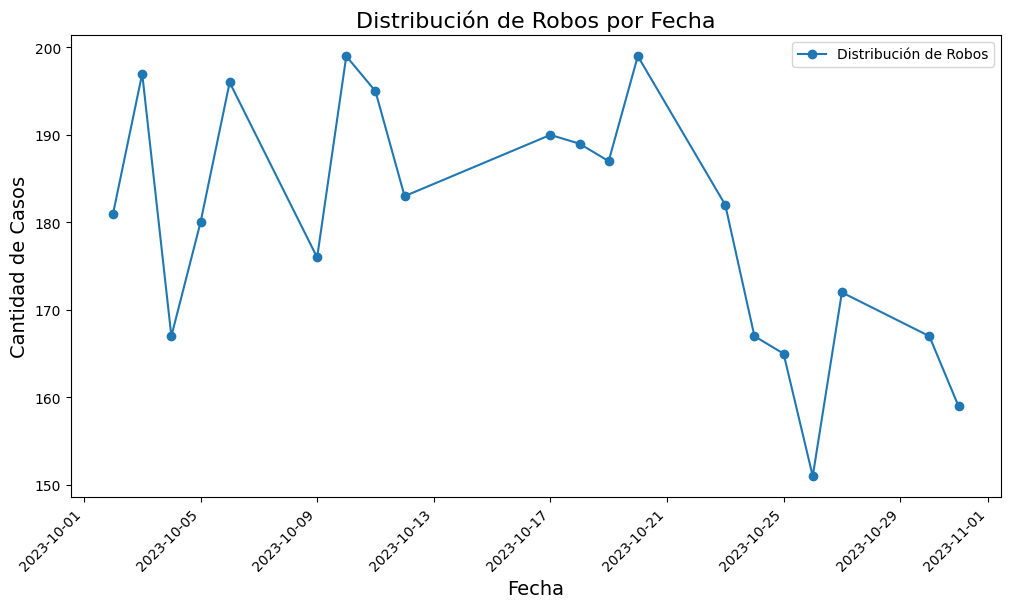

In [9]:
cantidades = DF3['tramite_fecha'].value_counts().sort_index()

fechas = cantidades.index
cantidad_casos = cantidades.values

plt.figure(figsize=(12, 6))
plt.plot(fechas, cantidad_casos, label='Distribución de Robos', marker='o', linestyle='-')

plt.title('Distribución de Robos por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de Casos', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend()


plt.show()

¿El año de la unidad es de interés para determinar una frecuencia estimada?

Se advierte que la mayor cantidad de robos se dan en unidades modelos 2010-2013, con una tendencia un poco menor hacia las unidades modelo 1996-2000 pero con menor magnitud en cuanto a cantidades con respecto a las de 2010-2023 Siendo Volkswagen y Chevrolet las unidades más robadas ( sin determinar por año) las mismas.

Text(0.5, 0, 'Año Modelo')

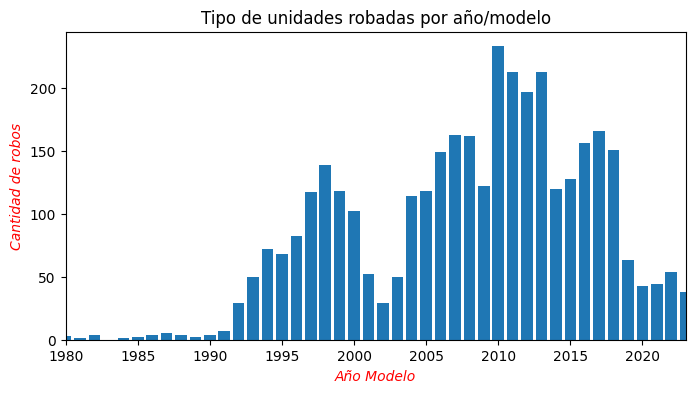

In [10]:
fig, ax = plt.subplots(figsize=(8,4))

qcasos = pd.value_counts(DF3['automotor_anio_modelo'])
ax.bar(qcasos.index, qcasos)
ax.set_xlim(1980,DF3['automotor_anio_modelo'].max())
ax.set_title('Tipo de unidades robadas por año/modelo')
ax.set_ylabel('Cantidad de robos', color="Red",fontstyle='italic')
ax.set_xlabel('Año Modelo',color="Red",fontstyle='italic')

¿Hay alguna marca que sea de incidencia en cuanto a las unidades robadas?
Si bien Volkswagen y Chevrolet son las marcas más robadas, no hay una tendencia muy inclinada o representativa hacia ellas con el resto de las analizadas dentro del top 6. Pero sí, podemos concluir que de la muestra tomada Volkswagen es la marca que mayor frecuencia de robos presenta, desprendiendose del resto por mas del 7% de diferencia

In [11]:
# Se visualiza en esta simple tabla el top 10 de marcas con más robos
DF3.groupby('automotor_marca_descripcion').size().nlargest(10)

automotor_marca_descripcion
VOLKSWAGEN       730
CHEVROLET        516
RENAULT          484
FIAT             467
FORD             400
PEUGEOT          391
TOYOTA           176
CITROEN          134
MERCEDES BENZ     40
NISSAN            40
dtype: int64

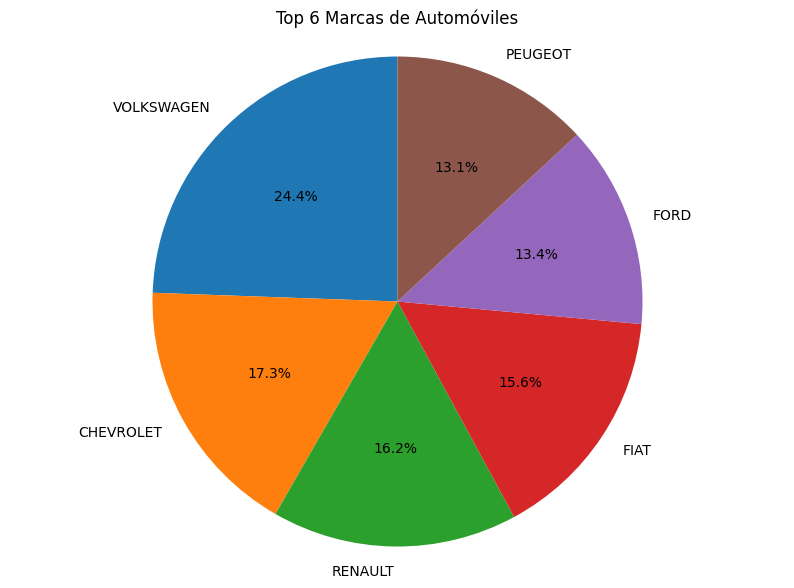

In [12]:
# Se grafica el top 6 de la tabla de más arriba

data_top = DF3['automotor_marca_descripcion']
cars = data_top.value_counts().head(6)

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(cars, labels=cars.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Top 6 Marcas de Automóviles')
plt.show()

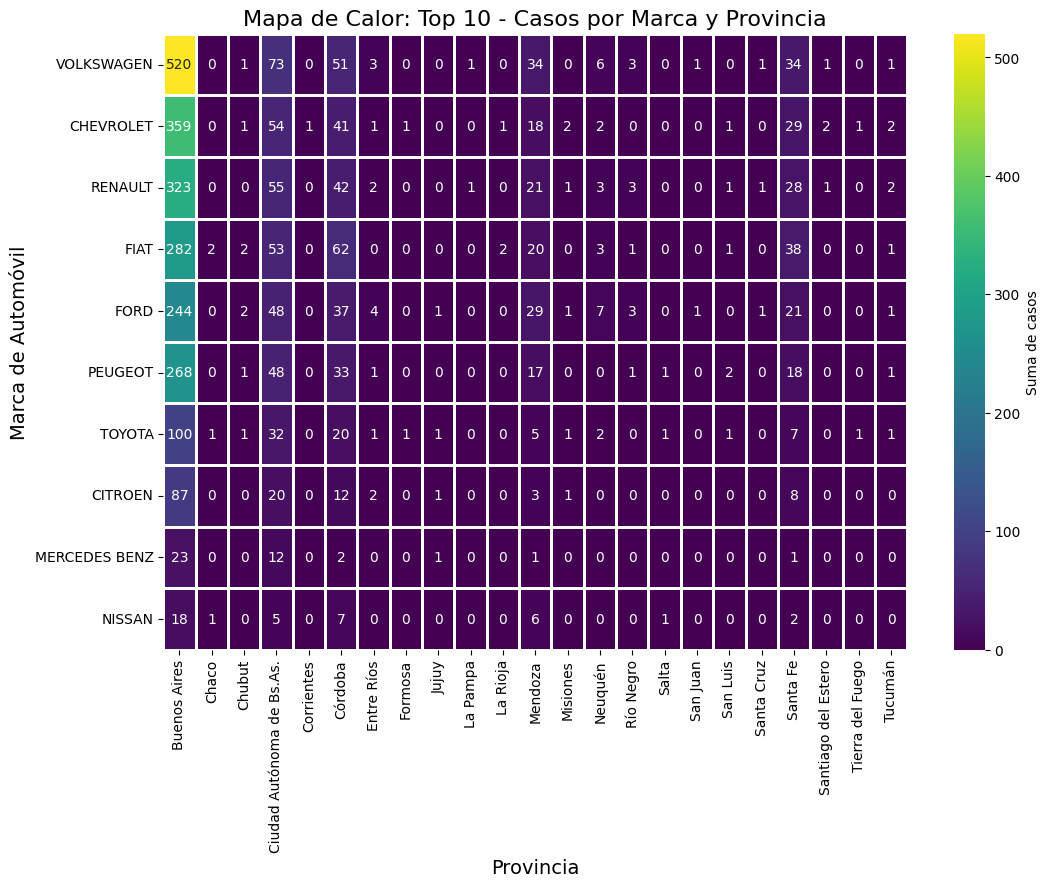

In [13]:
# Se crea la tabla pivot para poder  filtrar los datos que utilizaré
pivote = DF3.pivot_table(
    index="automotor_marca_descripcion",
    columns="registro_seccional_provincia",
    values="q_casos",
    fill_value=0,
    aggfunc="sum"
)
# Se Selecciona el gráfico , con el color requerido y las anotaciones dentro de las celdas
top_marca_provincia = pivote.sum(axis=1).nlargest(10).index
pivote_top = pivote.loc[top_marca_provincia]
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivote_top,
    cmap="viridis",
    fmt="d",
    annot=True,
    linewidths=1,
    cbar_kws={'label': 'Suma de casos'},
)

plt.title('Mapa de Calor: Top 10 - Casos por Marca y Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Marca de Automóvil', fontsize=14)

plt.show()

<ipython-input-14-ba8d37484e74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=DF3['EDAD'], palette="viridis")


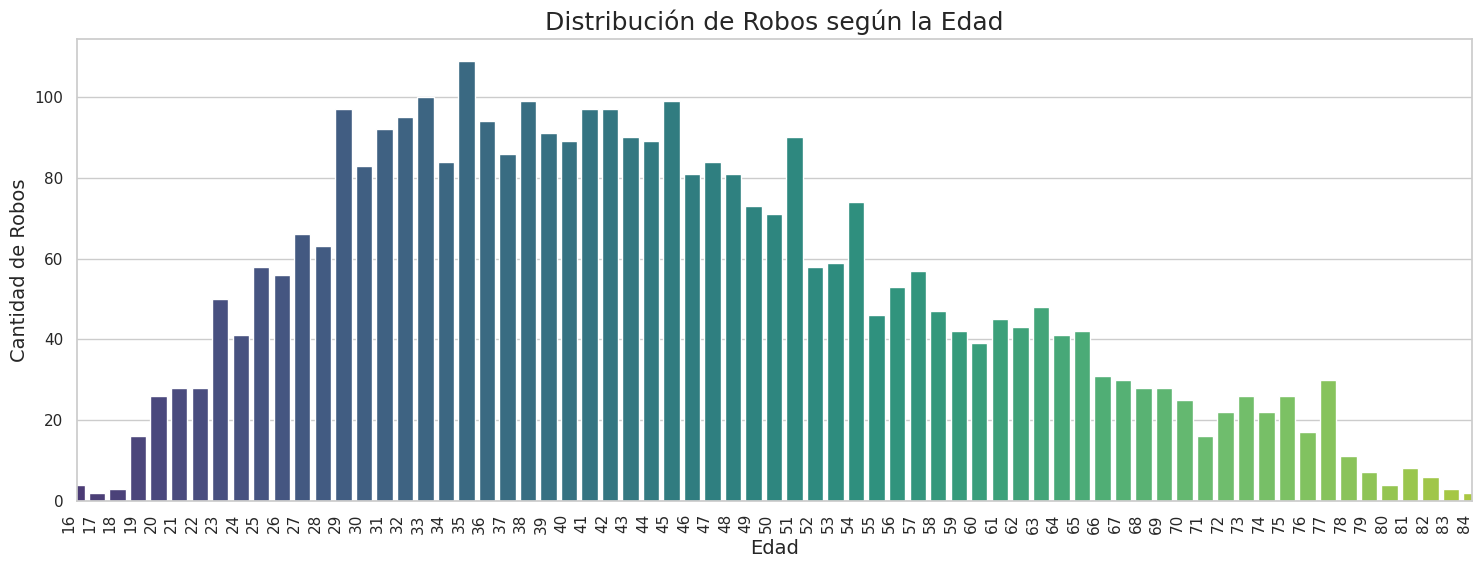

In [14]:
# Se settean las medidas y estilo del gráfico de  barras, junto con la variable a utilizar
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
sns.countplot(x=DF3['EDAD'], palette="viridis")
# Se le aplica un límite para las edades a visualizar
plt.xlim(12,80)
plt.title('Distribución de Robos según la Edad', fontsize=18)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad de Robos', fontsize=14)
plt.xticks(rotation=90, ha="right")

plt.show()

Exploratory Data Analysis
Luego de analizada la información obtenida del Dataset, se llega al siguiente análisis:
Se verifica q la frecuencia posee picos de mayor cantidad de sucesos registrados la primer semana y media de mes , se mantiene constante a continuacion, con su pico máximo el día 20

Existes dos grandes grupos de unidades robada segun el año de la misma, grupo1 = 1994-2000 y grupo2= 2006 a 2013. Es decir hay dos grupos de tendencia con mayor frecuencia de robo, los más buscados a la hora de cometer el delito.

Dentro del Top 6 de marcas mas robadas, se desprende con un % por encima del resto de las del top Volkswagen , como la marca más robada.

A su vez , ésta marca más robada , tiene su epicentro delictivo en la ciudad de Buenos Aires , registrando el mayor volumen por marca y ciudad de toda la muestra. Siguiendo la coherencia de mayor volumen de acuerdo a la densidad poblacional.

El promedio de edad de quienes sufren robos es de 43/44 años, pero la distribucion de robos por edad , no llega a tener una distribucion normal, sino que tiene una inclinación un poco más para la izquierda la campana.

In [15]:
#Se utiliza la siguiente tabla a modo de conocer rapidamente los promedios  en funcion a las edades y días registrados

subset_df = DF3[['dia', 'EDAD']]
Estad = subset_df.describe().loc[['mean', '50%','count']]

print(Estad)

               dia         EDAD
mean     15.714881    44.403387
50%      17.000000    43.000000
count  3602.000000  3602.000000


Aplicacion de un primer acercamiento a un modelo

In [16]:
numeric_features = ['EDAD']

pd.set_option('display.expand_frame_repr', False)

categorical_features = ['automotor_marca_descripcion', 'automotor_anio_modelo', 'automotor_modelo_descripcion', 'tramite_fecha']

train_data, test_data = train_test_split(DF3, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Defino las variables independientes (X) y la variable dependiente (y)
X_train = train_data.drop('tramite_tipo', axis=1)
y_train = train_data['tramite_tipo']


# Entreno el modelo
try:
    model.fit(X_train, y_train)
except Exception as e:
    print("Error al entrenar el modelo:", e)

X_test = test_data.drop('tramite_tipo', axis=1)
y_test = test_data['tramite_tipo']

predictions = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')


Precisión del modelo en el conjunto de prueba: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = model.predict(X_test)

# Calcula métricas de clasificación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA')
recall = recall_score(y_test, predictions, pos_label='DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA')
f1 = f1_score(y_test, predictions, pos_label='DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA')
conf_matrix = confusion_matrix(y_test, predictions, labels=['COMUNICACIÓN DE RECUPERO', 'DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA'])


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1-score: 0.98
Confusion Matrix:
[[  0  27]
 [  0 694]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


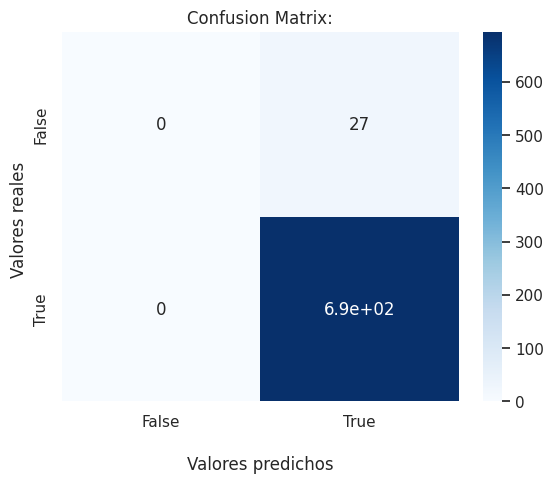

In [18]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
conf_matrix = confusion_matrix(y_test, predictions, labels=['COMUNICACIÓN DE RECUPERO', 'DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA'])
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix:');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Conclusion de la aplicacion del modelo 1
La interpretación teórica de las métricas de evaluación del modelo proporciona información sobre su rendimiento en términos de clasificación de instancias positivas y negativas. En tu caso, las métricas se calculan específicamente para la clase 'DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA'. Aquí hay una interpretación teórica para cada métrica:

Accuracy (Precisión global):

 La "Accuracy" global mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) entre todas las predicciones.
Relevancia para el modelo:  indica que el modelo es capaz de clasificar correctamente la mayoría de las instancias. con un 97% de acierto

Precision (Precisión):

 La precisión mide la proporción de instancias predichas como positivas que son verdaderamente positivas (verdaderos positivos) entre todas las instancias predichas como positivas (verdaderos positivos + falsos positivos).
Relevancia para el modelo: Una alta precisión indica que el modelo tiene una baja tasa de falsos positivos, es decir, cuando predice 'DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA', es probable que esté en lo correcto.
Precision del 97%

Recall (Recall o Sensibilidad):

El recall mide la proporción de instancias verdaderamente positivas que fueron correctamente identificadas por el modelo (verdaderos positivos) entre todas las instancias verdaderamente positivas (verdaderos positivos + falsos negativos).
Relevancia para el modelo: Un alto recall indica que el modelo es capaz de identificar la mayoría de las instancias positivas reales. 100% de efectividad en la prueba de recall


F1-score (Puntuación F1):

Interpretación: El F1-score es la media armónica de precisión y recall. Proporciona un equilibrio entre ambas métricas.
Relevancia para el modelo: Un alto F1-score indica un buen equilibrio entre precisión y recall. 99% para el F1-Score


Matriz de confusión:

La matriz de confusión muestra el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).
Relevancia para el modelo: Puedes analizar específicamente los tipos de errores que está cometiendo el modelo. Por ejemplo, un alto número de falsos positivos puede indicar una posible área de mejora.

 # Aproximación al modelo 2 Regresion
 **Se determina primero del DF original el top 6 de marcas** ya vistas mas arriba

In [19]:
nuevas_columnas = ["automotor_marca_descripcion", "registro_seccional_provincia", "EDAD", "automotor_anio_modelo", "q_casos"]
nuevo_df = DF3[nuevas_columnas]
nuevo_df.set_index("automotor_marca_descripcion", inplace=True)
nuevo_df.sort_values(by="automotor_marca_descripcion")

,registro_seccional_provincia,EDAD,automotor_anio_modelo,q_casos
automotor_marca_descripcion,,,,
-112-RENAULT,Buenos Aires,27,2008.0,1
ALFA ROMEO,Buenos Aires,27,2011.0,1
ALFA ROMEO,Buenos Aires,41,2011.0,1
ALFA ROMEO,Buenos Aires,42,2000.0,1
ALFA ROMEO,Santa Fe,43,1998.0,1
...,...,...,...,...
VOLKSWAGEN,Buenos Aires,38,2012.0,1
VOLSKWAGEN,Buenos Aires,27,2000.0,1
VOLSKWAGEN,Mendoza,55,1997.0,1


In [20]:
#Top 6 por Marca
marcas_deseadas = ["PEUGEOT", "VOLKSWAGEN", "FIAT", "RENAULT", "CHEVROLET","FORD"]
nuevas_columnas = ["automotor_marca_descripcion", "registro_seccional_provincia", "EDAD", "automotor_anio_modelo", "q_casos"]

nuevo_df = DF3[nuevas_columnas]
nuevo_df.set_index("automotor_marca_descripcion", inplace=True)

nuevo_df2 = nuevo_df.groupby("automotor_marca_descripcion")["q_casos"].sum()

Top_marcas= nuevo_df2.sort_values(ascending=False)
Top_marcas.head(6)

automotor_marca_descripcion
VOLKSWAGEN    730
CHEVROLET     516
RENAULT       484
FIAT          467
FORD          400
PEUGEOT       391
Name: q_casos, dtype: int64

Luego se le incorpora una columna nueva para poder establecer qué porcentaje de todo el dataframe representan esos 6 valores top

In [21]:
nuevo_df2 = nuevo_df.groupby("automotor_marca_descripcion")["q_casos"].sum()
Top_marcas = nuevo_df2.sort_values(ascending=False).head(10).reset_index()

# Calculo el total de casos De todo el dataframe original
total_casos = DF3["q_casos"].sum()

# Calculo el porcentaje para cada fila y agregarlo como una nueva columna
Top_marcas["Porcentaje de la muestra"] = round ((Top_marcas["q_casos"] / total_casos) * 100,2)

# Establezco la columna "registro_seccional_provincia" como índice
Top_marcas.set_index("automotor_marca_descripcion", inplace=True)

# Se muestra el DataFrame con la nueva columna de porcentaje y el índice por provincia
Top_marcas = Top_marcas.rename(columns={"q_casos": "Cantidad de casos", "Porcentaje de la muestra": "Porcentaje total"})
Top_marcas = Top_marcas.rename_axis("Top 6 Marcas mas Robadas")
print(Top_marcas)

                          Cantidad de casos  Porcentaje total
Top 6 Marcas mas Robadas                                     
VOLKSWAGEN                              730             20.27
CHEVROLET                               516             14.33
RENAULT                                 484             13.44
FIAT                                    467             12.97
FORD                                    400             11.10
PEUGEOT                                 391             10.86
TOYOTA                                  176              4.89
CITROEN                                 134              3.72
NISSAN                                   40              1.11
MERCEDES BENZ                            40              1.11


**Se analiza ahora la relacion de la variable de cantidad de casos con las provincias**

In [22]:
#Top 10 por Provincia
nuevo_df3 = nuevo_df.groupby("registro_seccional_provincia")["q_casos"].sum()
df_provincia= nuevo_df3.sort_values(ascending=False)
df_provincia.head(10)

registro_seccional_provincia
Buenos Aires                 2368
Ciudad Autónoma de Bs.As.     430
Córdoba                       321
Santa Fe                      197
Mendoza                       166
Neuquén                        26
Entre Ríos                     14
Río Negro                      12
Tucumán                         9
Chubut                          8
Name: q_casos, dtype: int64

Luego se le incorpora una columna nueva para poder establecer qué porcentaje de todo el dataframe representan esos 10 valores top

In [23]:
nuevo_df3 = nuevo_df.groupby("registro_seccional_provincia")["q_casos"].sum()
df_provincia = nuevo_df3.sort_values(ascending=False).head(10).reset_index()

# Calculo el total de casos De todo el dataframe original
total_casos = DF3["q_casos"].sum()

# Calculo el porcentaje para cada fila y agregarlo como una nueva columna
df_provincia["Porcentaje de la muestra"] = round((df_provincia["q_casos"] / total_casos) * 100,2)

# Se establece la columna "registro_seccional_provincia" como índice
df_provincia.set_index("registro_seccional_provincia", inplace=True)

# Muestro el DataFrame con la nueva columna de porcentaje y el índice por provincia

df_provincia = df_provincia.rename(columns={"q_casos": "Cantidad de casos", "Porcentaje de la muestra": "Porcentaje total"})
df_provincia = df_provincia.rename_axis("Top 10 Provincias con mas robos")
print(df_provincia)

                                 Cantidad de casos  Porcentaje total
Top 10 Provincias con mas robos                                     
Buenos Aires                                  2368             65.74
Ciudad Autónoma de Bs.As.                      430             11.94
Córdoba                                        321              8.91
Santa Fe                                       197              5.47
Mendoza                                        166              4.61
Neuquén                                         26              0.72
Entre Ríos                                      14              0.39
Río Negro                                       12              0.33
Tucumán                                          9              0.25
Chubut                                           8              0.22


**Se analiza la relacion de la variable por edad**

In [24]:
#Top 10 por Edad
nuevo_dfedad = nuevo_df.groupby("EDAD")["q_casos"].sum()

df_edad =nuevo_dfedad.sort_values(ascending=False)
df_edad.head(10)

EDAD
35    109
33    100
38     99
45     99
42     97
41     97
29     97
32     95
36     94
31     92
Name: q_casos, dtype: int64

Luego se le incorpora una columna nueva para poder establecer qué porcentaje de todo el dataframe representan esos 10 valores top

In [25]:
nuevo_dfedad = nuevo_df.groupby("EDAD")["q_casos"].sum()
df_edad = nuevo_dfedad.sort_values(ascending=False).head(10).reset_index()

# Calculoel total de casos De todo el dataframe original
total_casos = DF3["q_casos"].sum()

# Calculo el porcentaje para cada fila y agregarlo como una nueva columna
df_edad["Porcentaje de la muestra"] = round((df_edad["q_casos"] / total_casos) * 100,2)

# Eztablezco la columna "registro_seccional_provincia" como índice
df_edad.set_index("EDAD", inplace=True)

# Se muestra el DataFrame con la nueva columna de porcentaje y el índice por provincia
df_edad = df_edad.rename(columns={"q_casos": "Cantidad de casos", "Porcentaje de la muestra": "Porcentaje total"})
df_edad= df_edad.rename_axis("Top 10 edades con más robos")
print(df_edad)

                             Cantidad de casos  Porcentaje total
Top 10 edades con más robos                                     
35                                         109              3.03
33                                         100              2.78
38                                          99              2.75
45                                          99              2.75
42                                          97              2.69
41                                          97              2.69
29                                          97              2.69
32                                          95              2.64
36                                          94              2.61
31                                          92              2.55


**Se analiza la relacion de la variable cantidad de robos, con la del año de la unidad**

In [26]:
#Top 10 por Año
nuevo_df3 = nuevo_df.groupby("automotor_anio_modelo")["q_casos"].sum()
df_anio= nuevo_df3.sort_values(ascending=False)
df_anio.head(10)

automotor_anio_modelo
2010.0    233
2013.0    213
2011.0    213
2012.0    197
2017.0    166
2007.0    163
2008.0    162
2016.0    156
2018.0    151
2006.0    149
Name: q_casos, dtype: int64

In [27]:
nuevo_df3 = nuevo_df.groupby(["automotor_anio_modelo"])["q_casos"].sum()
df_anio = nuevo_df3.sort_values(ascending=False).head(10).reset_index()

# Calculo el total de casos De todo el dataframe original
total_casos = DF3["q_casos"].sum()

# Calculo el porcentaje para cada fila y agregarlo como una nueva columna
df_anio["Porcentaje de la muestra"] = round((df_anio["q_casos"] / total_casos) * 100,2)

# Establezco la columna "registro_seccional_provincia" como índice
df_anio.set_index("automotor_anio_modelo", inplace=True)

# Se DataFrame con la nueva columna de porcentaje y el índice por provincia
df_anio = df_anio.rename(columns={"q_casos": "Cantidad de casos", "Porcentaje de la muestra": "Porcentaje total"})
df_anio= df_anio.rename_axis("Top 10 de robos por año de unidad")
print(df_anio)


                                   Cantidad de casos  Porcentaje total
Top 10 de robos por año de unidad                                     
2010.0                                           233              6.47
2013.0                                           213              5.91
2011.0                                           213              5.91
2012.0                                           197              5.47
2017.0                                           166              4.61
2007.0                                           163              4.53
2008.0                                           162              4.50
2016.0                                           156              4.33
2018.0                                           151              4.19
2006.0                                           149              4.14


In [28]:
#Se procede a crear un dataframe con todas las metricas de frecuencia de robo
frecuencia_robos = DF3.groupby(["registro_seccional_provincia", "automotor_marca_descripcion","EDAD","automotor_anio_modelo"]).size() / len(DF3)

frecuencia_robos

registro_seccional_provincia  automotor_marca_descripcion  EDAD  automotor_anio_modelo
Buenos Aires                  -112-RENAULT                 27    2008.0                   0.000278
                              ALFA ROMEO                   27    2011.0                   0.000278
                                                           41    2011.0                   0.000278
                                                           42    2000.0                   0.000278
                              AUDI                         25    2009.0                   0.000278
                                                                                            ...   
Tucumán                       PEUGEOT                      26    2010.0                   0.000278
                              RENAULT                      36    2017.0                   0.000278
                                                           91    2012.0                   0.000278
                      

In [29]:
df = frecuencia_robos.reset_index()

df.columns = ["registro_seccional_provincia", "automotor_marca_descripcion","EDAD" ,"automotor_anio_modelo", "frecuencia_robos"]
df



,registro_seccional_provincia,automotor_marca_descripcion,EDAD,automotor_anio_modelo,frecuencia_robos
0,Buenos Aires,-112-RENAULT,27,2008.0,0.000278
1,Buenos Aires,ALFA ROMEO,27,2011.0,0.000278
2,Buenos Aires,ALFA ROMEO,41,2011.0,0.000278
3,Buenos Aires,ALFA ROMEO,42,2000.0,0.000278
4,Buenos Aires,AUDI,25,2009.0,0.000278
...,...,...,...,...,...
3271,Tucumán,PEUGEOT,26,2010.0,0.000278
3272,Tucumán,RENAULT,36,2017.0,0.000278
3273,Tucumán,RENAULT,91,2012.0,0.000278
3274,Tucumán,TOYOTA,20,1999.0,0.000278


In [30]:

# Hago los intervalos de frecuencia de robos y asigno clases seleccionando las variables
df["clase_frecuencia_robos"] = pd.cut(df["frecuencia_robos"], bins=5, labels=[1, 2, 3, 4, 5])

X = df[["registro_seccional_provincia", "automotor_marca_descripcion","EDAD", "automotor_anio_modelo"]]
y = df["clase_frecuencia_robos"]


In [31]:

encoder = OneHotEncoder()
ridge = Ridge(alpha=1.0)
ohe=  OneHotEncoder(handle_unknown="ignore", sparse_output= False).set_output(transform='pandas')
transform = ohe.fit_transform(df[["registro_seccional_provincia", "automotor_marca_descripcion", "EDAD", "automotor_anio_modelo"]])

# Dividir los datos en características (X) y etiquetas (y)
X = transform
y = df["frecuencia_robos"]


#X_encoded = ohe.fit_transform(df[["registro_seccional_provincia", "automotor_marca_descripcion", "EDAD", "automotor_anio_modelo"]])



# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ridge.fit(X_train, y_train)
# Inicializar y entrenar el modelo de regresión lineal
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ridge.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 8.822555368398542e-09


In [32]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
transform = ohe.fit_transform(df[["registro_seccional_provincia", "automotor_marca_descripcion", "EDAD", "automotor_anio_modelo"]])

# División de los datos en características (X) y etiquetas (y)
X = transform
y = df["frecuencia_robos"]

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Ajuste del modelo Ridge con un valor de alpha más alto
ridge = Ridge(alpha=1.0)  # Se incrementa el valor de alpha
ridge.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = ridge.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.822555368398542e-09


In [37]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
transform = ohe.fit_transform(df[["registro_seccional_provincia", "automotor_marca_descripcion", "EDAD", "automotor_anio_modelo"]])

# División de los datos en características (X) y etiquetas (y)
X = transform
y = df["frecuencia_robos"]

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Ajuste del modelo Ridge con un valor de alpha de 1.0
ridge = Ridge(alpha=1.0)

# Aplicar validación cruzada con 5 pliegues
cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores a MSE positivo y calcular el promedio
mse_scores = -cv_scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print("Mean Squared Error (MSE) en validación cruzada:", mean_mse)
print("Desviación estándar del MSE en validación cruzada:", std_mse)

# Ajuste del modelo en todo el conjunto de entrenamiento y evaluación en el conjunto de prueba
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Evaluación del modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error en el conjunto de prueba:", mse_test)

Mean Squared Error (MSE) en validación cruzada: 9.65414030837736e-09
Desviación estándar del MSE en validación cruzada: 3.4189828318199066e-09
Mean Squared Error en el conjunto de prueba: 8.822555368398542e-09


*Se* aplica el análisis de reducción de dimensionalidad, PCA (Análisis de Componentes Principales)

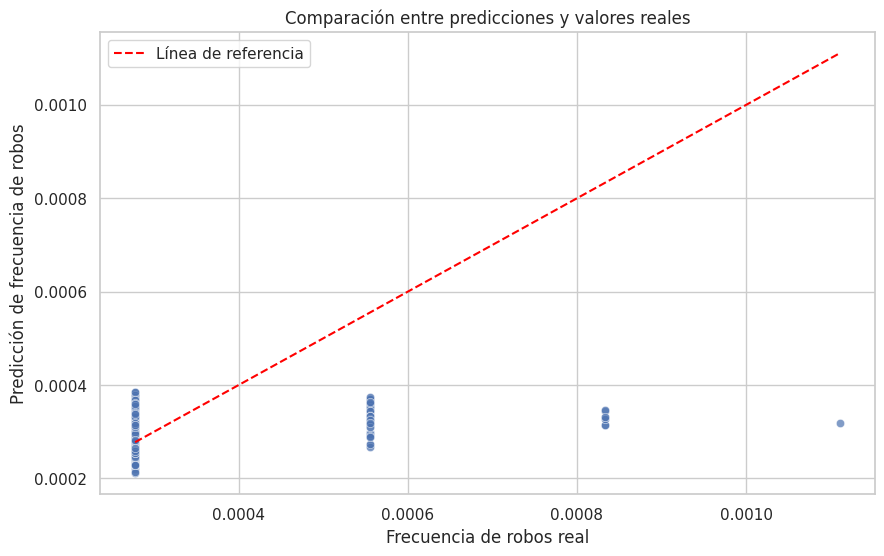

In [38]:
results = pd.DataFrame({"Frecuencia de robos real": y_test, "Predicción de frecuencia de robos": y_pred})

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos
sns.scatterplot(data=results, x="Frecuencia de robos real", y="Predicción de frecuencia de robos", alpha=0.7)

# Graficar la línea de referencia (diagonal)
plt.plot([results["Frecuencia de robos real"].min(), results["Frecuencia de robos real"].max()],
         [results["Frecuencia de robos real"].min(), results["Frecuencia de robos real"].max()],
         linestyle="--", color="red", label="Línea de referencia")

# Ajustes de estilo y etiquetas
plt.xlabel("Frecuencia de robos real")
plt.ylabel("Predicción de frecuencia de robos")
plt.title("Comparación entre predicciones y valores reales")
plt.legend()

# Mostrar el gráfico
plt.show()

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=1)  # Conservar solo la PC1
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión con PC1
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ridge.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.984757444988784e-09


Conclusion del uso del modelo aplicado
Dado el rango de valores de la variable objetivo y el MSE Muy bajo, cercano a  lo cual indicaría una precisión alta, tampoco es excepcionalmente alto, lo que sugiere que las predicciones del modelo son razonablemente cercanas a los valores reales en promedio.

Por lo tanto, se concluye que el modelo de regresión lineal actual sigue siendo útil y representativo para predecir la variable objetivo con las variables evaluadas. Sin embargo, es importante tener en cuenta que, a medida que el volumen de robos aumenta, las predicciones del modelo pueden ser menos precisas debido a la complejidad del fenómeno y a otros factores no capturados por las variables en el modelo.

con los resultados de la validacion cruzada, nos dos parametros,
o que el modelo es extremadamente preciso, o bien que esta bajo un overfitting importante.
Me inclino a pensar en la precision del modelo, tras los resultados de la validacion cruzada

Rendimiento General del Modelo:

El MSE medio en la validación cruzada es extremadamente bajo (
9.65414030837736*10^-09). Esto indica que el modelo de regresión Ridge está funcionando muy bien en los diferentes subconjuntos de los datos de entrenamiento. Un MSE tan pequeño sugiere que las predicciones del modelo están muy cerca de los valores reales, lo cual es una señal de un modelo altamente preciso.
Consistencia del Modelo:

La desviación estándar del MSE en la validación cruzada (
3.4189828318199066*10^-09) también es baja, lo que significa que el modelo es consistente en sus predicciones a través de los diferentes pliegues de la validación cruzada. Una baja desviación estándar indica que el rendimiento del modelo es estable y no varía significativamente entre diferentes subconjuntos de los datos de entrenamiento.
Comparación con el Conjunto de Prueba:

El MSE en el conjunto de prueba (
8.822555368398542*10^-09) es muy similar al MSE medio obtenido en la validación cruzada. Esto es una señal positiva, ya que sugiere que el modelo generaliza bien a datos nuevos no vistos durante el entrenamiento. La similitud entre estos valores indica que el modelo no está sobreajustado a los datos de entrenamiento y es capaz de mantener su precisión en datos de prueba.
Conclusión:
Los resultados muestran que el modelo de regresión Ridge es altamente preciso y consistente. La similitud entre el MSE de validación cruzada y el MSE del conjunto de prueba sugiere que el modelo tiene un buen rendimiento general y no está sobreajustado. En resumen, el modelo parece ser robusto y efectivo para predecir la frecuencia de robos basándose en las características proporcionadas.